# 🔤 ETAPA 1: Procesamiento de Lenguaje Natural (NLP)

**Proyecto:** Sistema de Análisis de Sentimiento - Amazon Reviews  
**Curso:** Data Science III - NLP & Deep Learning  
**Autor:** Miguel  
**Fecha:** Enero 2026

---

## 📋 Objetivos de este Notebook (ETAPA 1)

Aplicar técnicas de Procesamiento de Lenguaje Natural según los lineamientos del proyecto:

1. ✅ Limpieza de texto (símbolos, puntuación)
2. ✅ Tokenización
3. ✅ Conversión a minúsculas
4. ✅ Remover stopwords
5. ✅ Lemmatización y Stemming
6. ✅ Análisis de frecuencias
7. ✅ Crear nubes de palabras
8. ✅ Crear N-gramas (bigramas, trigramas)
9. ✅ Aplicar análisis de sentimiento (VADER, TextBlob)

---

## 1. Setup e Imports

In [1]:
# Data manipulation
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# NLP Libraries
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer, PorterStemmer
from nltk import bigrams, trigrams
from collections import Counter

# Sentiment Analysis
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from textblob import TextBlob

# System
import sys
from pathlib import Path
import warnings
warnings.filterwarnings('ignore')

# Agregar carpeta raíz al path
sys.path.append('../')

# Imports locales
from config import *
from src.data_loader import *
from src.preprocessing import *

print("✅ Imports completados exitosamente")

✅ Imports completados exitosamente


In [2]:
# Configuración de visualización
plt.style.use('default')
sns.set_palette("husl")
%matplotlib inline

# Configuración de pandas
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

# Tamaño de figuras por defecto
plt.rcParams['figure.figsize'] = (12, 6)

print("✅ Configuración lista")

✅ Configuración lista


In [3]:
# Descargar recursos de NLTK si no los tienes
nltk.download('punkt', quiet=True)
nltk.download('stopwords', quiet=True)
nltk.download('wordnet', quiet=True)
nltk.download('averaged_perceptron_tagger', quiet=True)
nltk.download('omw-1.4', quiet=True)

print("✅ Recursos NLTK descargados")

✅ Recursos NLTK descargados


## 2. Cargar Datos Procesados

In [4]:
# Cargar datos del notebook anterior
df = load_processed_data(filename='reviews_clean.csv')

print(f"\n📊 Dataset cargado:")
print(f"   - Filas: {len(df):,}")
print(f"   - Columnas: {df.columns.tolist()}")
print(f"   - Positivos: {(df['Sentiment']==1).sum():,}")
print(f"   - Negativos: {(df['Sentiment']==0).sum():,}")

📂 Cargando datos procesados desde: c:\Users\maike\OneDrive\Escritorio\Proyecto Datascience 3\notebooks\..\data\processed\reviews_clean.csv
✅ Datos cargados: 363,836 filas

📊 Dataset cargado:
   - Filas: 363,836
   - Columnas: ['Text', 'Summary', 'Score', 'Sentiment', 'Text_Length', 'Word_Count']
   - Positivos: 306,766
   - Negativos: 57,070


In [5]:
# Mostrar algunas filas
df.head()

,Text,Summary,Score,Sentiment,Text_Length,Word_Count
0,I have bought several of the Vitality canned d...,Good Quality Dog Food,5,1,263,48
1,Product arrived labeled as Jumbo Salted Peanut...,Not as Advertised,1,0,190,31
2,This is a confection that has been around a fe...,"""Delight"" says it all",4,1,509,94
3,If you are looking for the secret ingredient i...,Cough Medicine,2,0,219,41
4,Great taffy at a great price. There was a wid...,Great taffy,5,1,140,27


## 3. Limpieza de Texto

### Paso 1: Quitar símbolos y signos de puntuación

In [6]:
# Ejemplo de texto antes de limpieza
sample_text = df['Text'].iloc[0]

print("📝 TEXTO ORIGINAL:")
print("="*80)
print(sample_text[:300])
print("="*80)

📝 TEXTO ORIGINAL:
I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than  most.


In [7]:
# Aplicar limpieza básica
print("🔄 Aplicando limpieza de texto...")
print("   - Removiendo URLs, HTML, emails")
print("   - Expandiendo contracciones")
print("   - Removiendo puntuación")
print("   - Convirtiendo a minúsculas")

df['Text_Clean'] = df['Text'].apply(clean_text)

print("\n✅ Limpieza completada")

🔄 Aplicando limpieza de texto...
   - Removiendo URLs, HTML, emails
   - Expandiendo contracciones
   - Removiendo puntuación
   - Convirtiendo a minúsculas

✅ Limpieza completada


In [8]:
# Comparar antes y después
print("📝 TEXTO LIMPIO:")
print("="*80)
print(df['Text_Clean'].iloc[0][:300])
print("="*80)

📝 TEXTO LIMPIO:
i have bought several of the vitality canned dog food products and have found them all to be of good quality the product looks more like a stew than a processed meat and it smells better my labrador is finicky and she appreciates this product better than most


## 4. Tokenización

### Convertir texto en lista de palabras (tokens)

In [9]:
# Tokenizar textos
print("🔄 Tokenizando textos...")

df['Tokens'] = df['Text_Clean'].apply(tokenize_text)

print("✅ Tokenización completada")
print(f"\nEjemplo de tokens:")
print(df['Tokens'].iloc[0][:20])

🔄 Tokenizando textos...
✅ Tokenización completada

Ejemplo de tokens:
['i', 'have', 'bought', 'several', 'of', 'the', 'vitality', 'canned', 'dog', 'food', 'products', 'and', 'have', 'found', 'them', 'all', 'to', 'be', 'of', 'good']


## 5. Remover Stopwords

### Eliminar palabras comunes sin significado (the, is, and, etc.)

In [10]:
# Ver stopwords en inglés
stop_words = set(stopwords.words('english'))
print(f"📋 Stopwords en inglés ({len(stop_words)} palabras):")
print(list(stop_words)[:30])

📋 Stopwords en inglés (198 palabras):
["wasn't", "you're", 'am', 'o', "won't", 'have', 'any', 'shouldn', "isn't", "they'd", 'more', 'while', 'down', 'mustn', 't', "i'm", 'haven', 'on', "we'll", "she'd", 'with', 'being', 'yourselves', 'its', 'won', 'ourselves', 'her', 'a', 'has', 'no']


In [11]:
# Remover stopwords
print("🔄 Removiendo stopwords...")

df['Tokens_NoStop'] = df['Tokens'].apply(remove_stopwords)

print("\n✅ Stopwords removidas")
print(f"\nEjemplo:")
print(f"Con stopwords: {df['Tokens'].iloc[0][:15]}")
print(f"Sin stopwords: {df['Tokens_NoStop'].iloc[0][:15]}")

🔄 Removiendo stopwords...

✅ Stopwords removidas

Ejemplo:
Con stopwords: ['i', 'have', 'bought', 'several', 'of', 'the', 'vitality', 'canned', 'dog', 'food', 'products', 'and', 'have', 'found', 'them']
Sin stopwords: ['bought', 'several', 'vitality', 'canned', 'dog', 'food', 'products', 'found', 'good', 'quality', 'product', 'looks', 'like', 'stew', 'processed']


## 6. Lemmatización

### Reducir palabras a su forma base (running → run, better → good)

In [12]:
# Aplicar lemmatización
print("🔄 Aplicando lemmatización...")
print("   (Esto puede tomar unos minutos con 360k+ reviews)")

df['Tokens_Lemma'] = df['Tokens_NoStop'].apply(apply_lemmatization)

print("\n✅ Lemmatización completada")

🔄 Aplicando lemmatización...
   (Esto puede tomar unos minutos con 360k+ reviews)

✅ Lemmatización completada


In [13]:
# Comparar: original vs lemmatized
print("📊 COMPARACIÓN:")
print("="*80)
print(f"Original:     {' '.join(df['Tokens_NoStop'].iloc[0][:15])}")
print(f"Lemmatizado:  {' '.join(df['Tokens_Lemma'].iloc[0][:15])}")
print("="*80)

📊 COMPARACIÓN:
Original:     bought several vitality canned dog food products found good quality product looks like stew processed
Lemmatizado:  bought several vitality canned dog food product found good quality product look like stew processed


In [14]:
# Crear columna de texto procesado final (para usar después)
df['Text_Processed'] = df['Tokens_Lemma'].apply(lambda x: ' '.join(x))

print("✅ Texto procesado final creado")
print(f"\nEjemplo de texto procesado:")
print(df['Text_Processed'].iloc[0][:200])

✅ Texto procesado final creado

Ejemplo de texto procesado:
bought several vitality canned dog food product found good quality product look like stew processed meat smell better labrador finicky appreciates product better


## 7. Análisis de Frecuencias

### Palabras más comunes en todo el dataset

In [15]:
# Obtener todas las palabras
all_words = [word for tokens in df['Tokens_Lemma'] for word in tokens]

print(f"📊 Total de palabras procesadas: {len(all_words):,}")
print(f"   Palabras únicas: {len(set(all_words)):,}")

📊 Total de palabras procesadas: 13,965,117
   Palabras únicas: 293,370


In [16]:
# Top 30 palabras más frecuentes
word_freq = Counter(all_words)
top_30_words = word_freq.most_common(30)

print("📋 TOP 30 PALABRAS MÁS FRECUENTES:")
print("="*80)
for i, (word, count) in enumerate(top_30_words, 1):
    print(f"{i:2d}. {word:15s} - {count:,} apariciones")
print("="*80)

📋 TOP 30 PALABRAS MÁS FRECUENTES:
 1. like            - 158,243 apariciones
 2. taste           - 131,109 apariciones
 3. good            - 122,905 apariciones
 4. product         - 115,498 apariciones
 5. one             - 114,553 apariciones
 6. flavor          - 107,322 apariciones
 7. great           - 106,184 apariciones
 8. love            - 99,248 apariciones
 9. would           - 94,540 apariciones
10. tea             - 91,537 apariciones
11. coffee          - 90,204 apariciones
12. food            - 75,033 apariciones
13. get             - 72,807 apariciones
14. make            - 71,976 apariciones
15. time            - 61,763 apariciones
16. really          - 61,703 apariciones
17. use             - 56,683 apariciones
18. much            - 56,422 apariciones
19. amazon          - 53,709 apariciones
20. also            - 52,971 apariciones
21. little          - 51,475 apariciones
22. price           - 50,486 apariciones
23. best            - 49,538 apariciones
24. find        

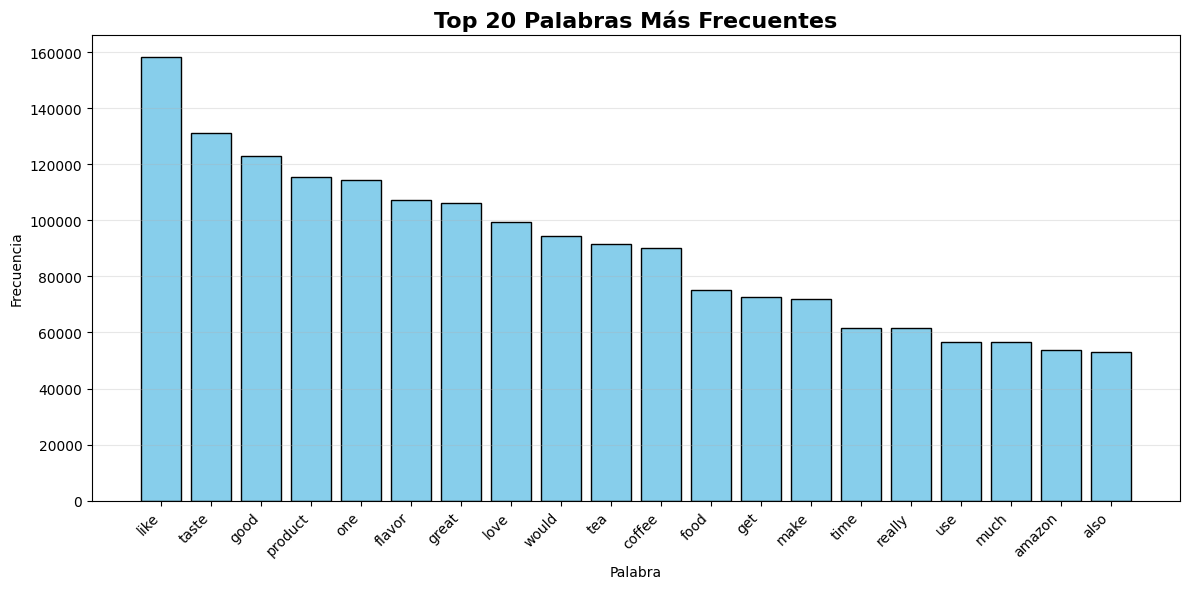

In [17]:
# Visualizar top 20
top_20 = dict(top_30_words[:20])

plt.figure(figsize=(12, 6))
plt.bar(range(len(top_20)), list(top_20.values()), color='skyblue', edgecolor='black')
plt.xticks(range(len(top_20)), list(top_20.keys()), rotation=45, ha='right')
plt.title('Top 20 Palabras Más Frecuentes', fontsize=16, fontweight='bold')
plt.xlabel('Palabra')
plt.ylabel('Frecuencia')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

### Palabras más frecuentes por Sentimiento

In [18]:
# Palabras en reviews POSITIVOS
positive_words = [word for tokens in df[df['Sentiment']==1]['Tokens_Lemma'] for word in tokens]
positive_freq = Counter(positive_words)
top_positive = positive_freq.most_common(20)

print("✅ TOP 20 PALABRAS EN REVIEWS POSITIVOS:")
print("="*80)
for i, (word, count) in enumerate(top_positive, 1):
    print(f"{i:2d}. {word:15s} - {count:,} apariciones")
print("="*80)

✅ TOP 20 PALABRAS EN REVIEWS POSITIVOS:
 1. like            - 128,062 apariciones
 2. good            - 108,434 apariciones
 3. taste           - 103,926 apariciones
 4. great           - 100,544 apariciones
 5. one             - 94,381 apariciones
 6. love            - 92,346 apariciones
 7. flavor          - 91,021 apariciones
 8. product         - 88,211 apariciones
 9. tea             - 80,341 apariciones
10. coffee          - 76,016 apariciones
11. would           - 71,558 apariciones
12. make            - 63,813 apariciones
13. food            - 62,723 apariciones
14. get             - 61,171 apariciones
15. really          - 52,393 apariciones
16. time            - 52,326 apariciones
17. use             - 50,446 apariciones
18. much            - 47,112 apariciones
19. best            - 46,662 apariciones
20. also            - 46,431 apariciones


In [19]:
# Palabras en reviews NEGATIVOS
negative_words = [word for tokens in df[df['Sentiment']==0]['Tokens_Lemma'] for word in tokens]
negative_freq = Counter(negative_words)
top_negative = negative_freq.most_common(20)

print("❌ TOP 20 PALABRAS EN REVIEWS NEGATIVOS:")
print("="*80)
for i, (word, count) in enumerate(top_negative, 1):
    print(f"{i:2d}. {word:15s} - {count:,} apariciones")
print("="*80)

❌ TOP 20 PALABRAS EN REVIEWS NEGATIVOS:
 1. like            - 30,181 apariciones
 2. product         - 27,287 apariciones
 3. taste           - 27,183 apariciones
 4. would           - 22,982 apariciones
 5. one             - 20,172 apariciones
 6. flavor          - 16,301 apariciones
 7. good            - 14,471 apariciones
 8. coffee          - 14,188 apariciones
 9. food            - 12,310 apariciones
10. get             - 11,636 apariciones
11. tea             - 11,196 apariciones
12. even            - 10,767 apariciones
13. box             - 10,342 apariciones
14. buy             - 10,011 apariciones
15. time            - 9,437 apariciones
16. much            - 9,310 apariciones
17. really          - 9,310 apariciones
18. bag             - 9,229 apariciones
19. amazon          - 9,203 apariciones
20. could           - 8,644 apariciones


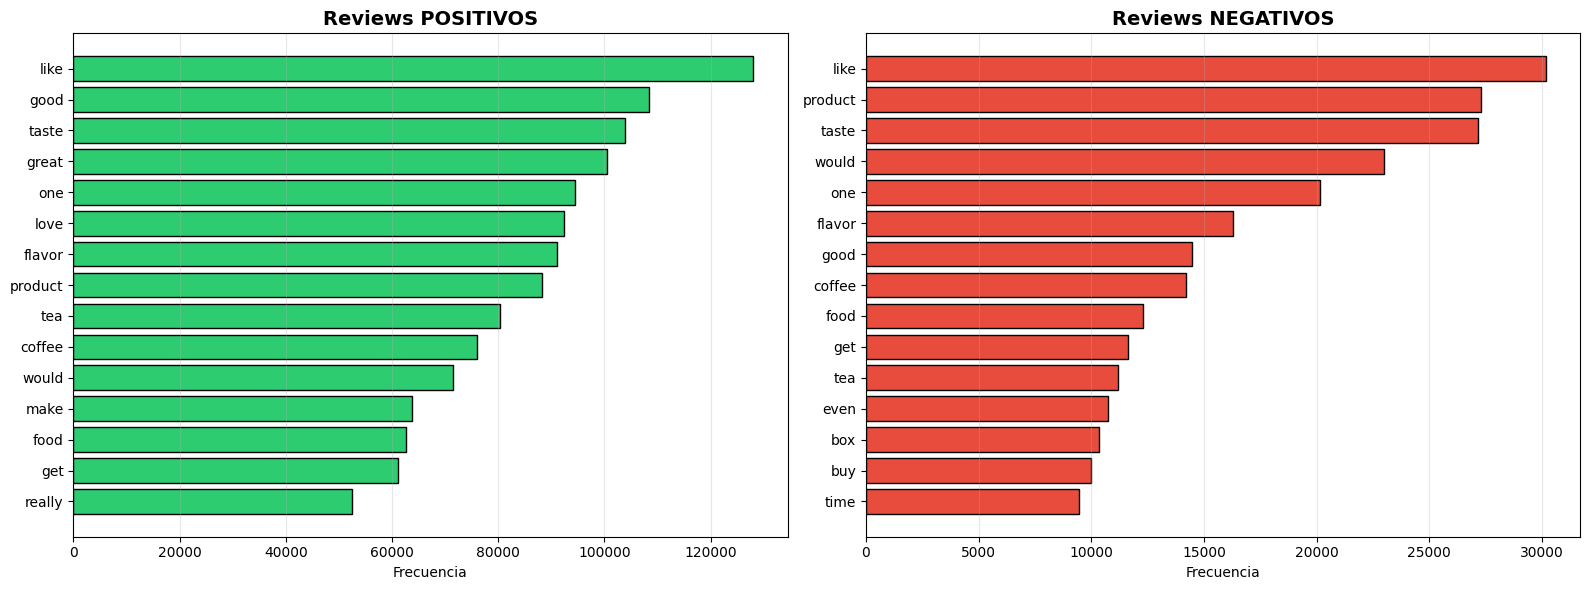

In [20]:
# Comparar positivos vs negativos lado a lado
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Positivos
pos_dict = dict(top_positive[:15])
axes[0].barh(range(len(pos_dict)), list(pos_dict.values()), color='#2ecc71', edgecolor='black')
axes[0].set_yticks(range(len(pos_dict)))
axes[0].set_yticklabels(list(pos_dict.keys()))
axes[0].set_title('Reviews POSITIVOS', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Frecuencia')
axes[0].invert_yaxis()
axes[0].grid(axis='x', alpha=0.3)

# Negativos
neg_dict = dict(top_negative[:15])
axes[1].barh(range(len(neg_dict)), list(neg_dict.values()), color='#e74c3c', edgecolor='black')
axes[1].set_yticks(range(len(neg_dict)))
axes[1].set_yticklabels(list(neg_dict.keys()))
axes[1].set_title('Reviews NEGATIVOS', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Frecuencia')
axes[1].invert_yaxis()
axes[1].grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.show()

## 8. Nubes de Palabras (WordCloud)

### Nube de Palabras General

In [21]:
# Crear texto completo
all_text = ' '.join(df['Text_Processed'])

print(f"📊 Generando nube de palabras general...")
print(f"   Total caracteres: {len(all_text):,}")

📊 Generando nube de palabras general...
   Total caracteres: 92,184,297


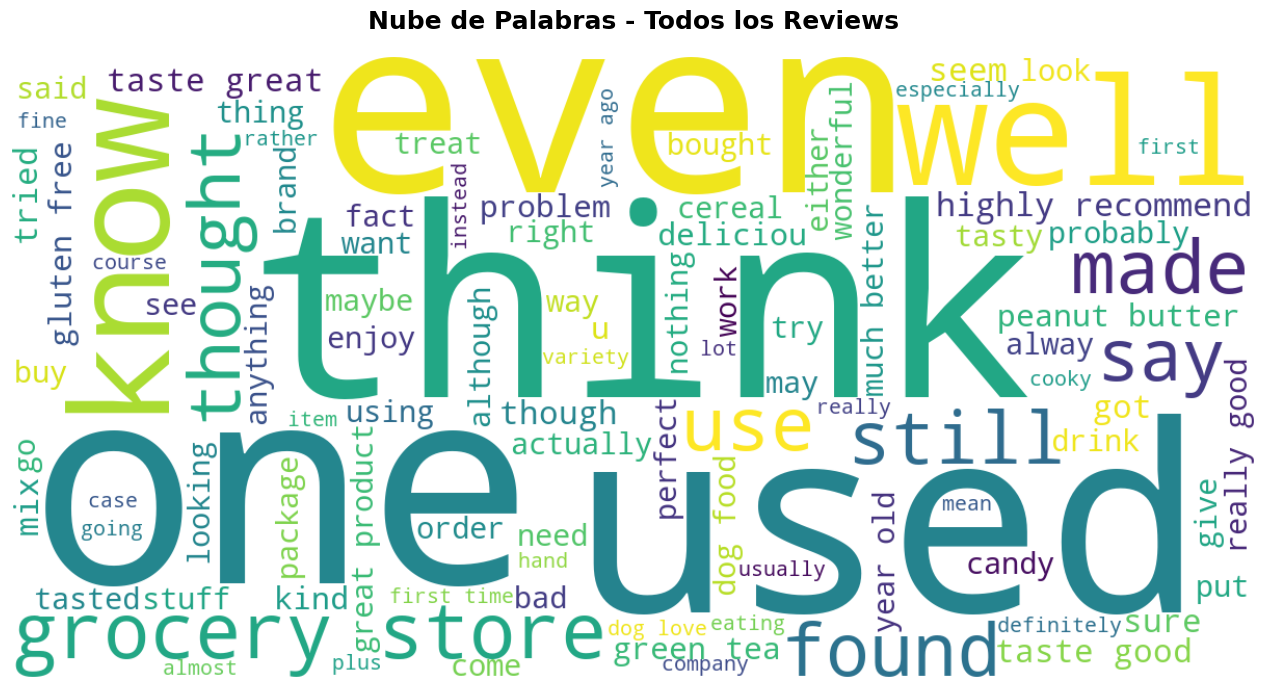

✅ Nube de palabras general creada


In [22]:
# Generar WordCloud
wordcloud = WordCloud(width=1200, height=600, 
                      background_color='white',
                      colormap='viridis',
                      max_words=100,
                      relative_scaling=0.5).generate(all_text)

plt.figure(figsize=(14, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nube de Palabras - Todos los Reviews', fontsize=18, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

print("✅ Nube de palabras general creada")

### Nube de Palabras - Reviews POSITIVOS

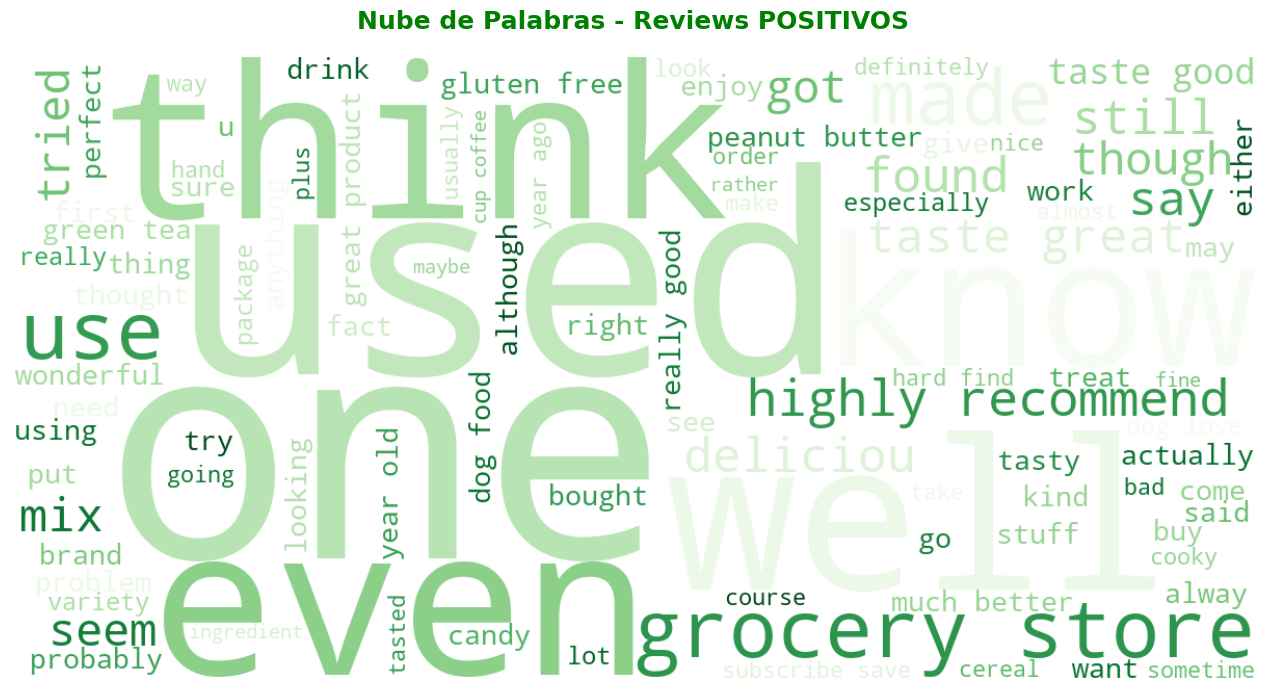

✅ Nube de palabras positivos creada


In [23]:
# Texto de reviews positivos
positive_text = ' '.join(df[df['Sentiment']==1]['Text_Processed'])

# Generar WordCloud positivo
wordcloud_pos = WordCloud(width=1200, height=600, 
                          background_color='white',
                          colormap='Greens',
                          max_words=100,
                          relative_scaling=0.5).generate(positive_text)

plt.figure(figsize=(14, 7))
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.axis('off')
plt.title('Nube de Palabras - Reviews POSITIVOS', fontsize=18, fontweight='bold', 
          pad=20, color='green')
plt.tight_layout()
plt.show()

print("✅ Nube de palabras positivos creada")

### Nube de Palabras - Reviews NEGATIVOS

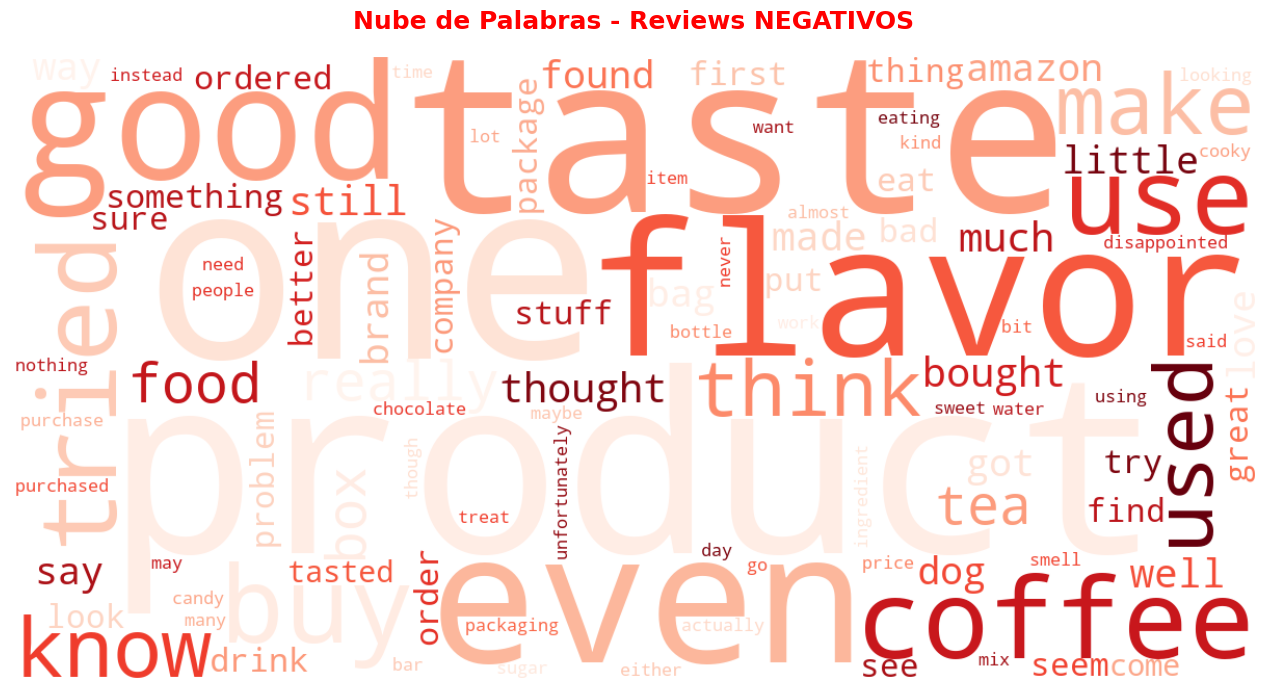

✅ Nube de palabras negativos creada


In [24]:
# Texto de reviews negativos
negative_text = ' '.join(df[df['Sentiment']==0]['Text_Processed'])

# Generar WordCloud negativo
wordcloud_neg = WordCloud(width=1200, height=600, 
                          background_color='white',
                          colormap='Reds',
                          max_words=100,
                          relative_scaling=0.5).generate(negative_text)

plt.figure(figsize=(14, 7))
plt.imshow(wordcloud_neg, interpolation='bilinear')
plt.axis('off')
plt.title('Nube de Palabras - Reviews NEGATIVOS', fontsize=18, fontweight='bold', 
          pad=20, color='red')
plt.tight_layout()
plt.show()

print("✅ Nube de palabras negativos creada")

## 9. N-gramas: Bigramas y Trigramas

### Bigramas (combinaciones de 2 palabras)

In [25]:
# Generar bigramas
print("🔄 Generando bigramas...")

all_bigrams = []
for tokens in df['Tokens_Lemma']:
    all_bigrams.extend(list(bigrams(tokens)))

bigram_freq = Counter(all_bigrams)
top_bigrams = bigram_freq.most_common(20)

print("\n📋 TOP 20 BIGRAMAS MÁS FRECUENTES:")
print("="*80)
for i, (bigram, count) in enumerate(top_bigrams, 1):
    print(f"{i:2d}. {bigram[0]:12s} {bigram[1]:12s} - {count:,} apariciones")
print("="*80)

🔄 Generando bigramas...

📋 TOP 20 BIGRAMAS MÁS FRECUENTES:
 1. taste        like         - 16,165 apariciones
 2. grocery      store        - 11,699 apariciones
 3. highly       recommend    - 9,617 apariciones
 4. taste        great        - 8,800 apariciones
 5. taste        good         - 8,515 apariciones
 6. peanut       butter       - 8,250 apariciones
 7. green        tea          - 8,126 apariciones
 8. gluten       free         - 7,885 apariciones
 9. much         better       - 7,205 apariciones
10. dog          food         - 6,702 apariciones
11. would        recommend    - 6,177 apariciones
12. really       good         - 6,127 apariciones
13. great        product      - 6,101 apariciones
14. really       like         - 5,931 apariciones
15. year         old          - 5,747 apariciones
16. dog          love         - 5,125 apariciones
17. year         ago          - 5,079 apariciones
18. first        time         - 4,945 apariciones
19. subscribe    save         - 4,759 a

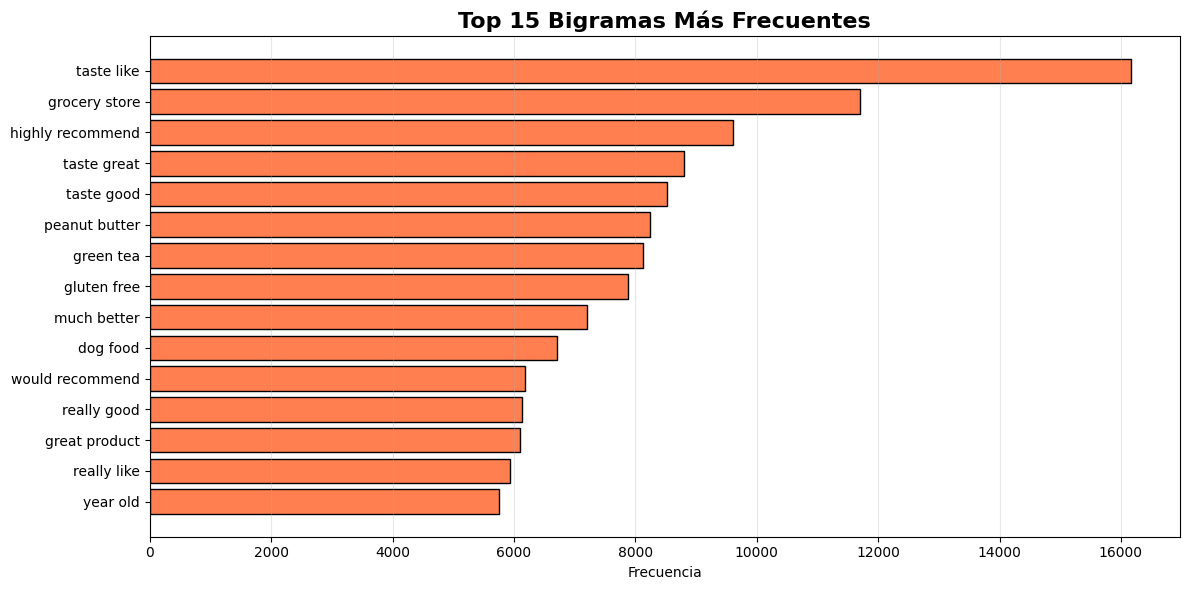

In [26]:
# Visualizar bigramas
bigram_labels = [f"{b[0]} {b[1]}" for b, c in top_bigrams[:15]]
bigram_counts = [c for b, c in top_bigrams[:15]]

plt.figure(figsize=(12, 6))
plt.barh(range(len(bigram_labels)), bigram_counts, color='coral', edgecolor='black')
plt.yticks(range(len(bigram_labels)), bigram_labels)
plt.title('Top 15 Bigramas Más Frecuentes', fontsize=16, fontweight='bold')
plt.xlabel('Frecuencia')
plt.gca().invert_yaxis()
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

### Trigramas (combinaciones de 3 palabras)

In [27]:
# Generar trigramas
print("🔄 Generando trigramas...")

all_trigrams = []
for tokens in df['Tokens_Lemma']:
    all_trigrams.extend(list(trigrams(tokens)))

trigram_freq = Counter(all_trigrams)
top_trigrams = trigram_freq.most_common(20)

print("\n📋 TOP 20 TRIGRAMAS MÁS FRECUENTES:")
print("="*80)
for i, (trigram, count) in enumerate(top_trigrams, 1):
    print(f"{i:2d}. {trigram[0]:10s} {trigram[1]:10s} {trigram[2]:10s} - {count:,} apariciones")
print("="*80)

🔄 Generando trigramas...

📋 TOP 20 TRIGRAMAS MÁS FRECUENTES:
 1. local      grocery    store      - 2,852 apariciones
 2. health     food       store      - 1,527 apariciones
 3. would      highly     recommend  - 1,426 apariciones
 4. highly     recommend  product    - 1,322 apariciones
 5. high       fructose   corn       - 1,274 apariciones
 6. fructose   corn       syrup      - 1,215 apariciones
 7. go         long       way        - 1,187 apariciones
 8. bob        red        mill       - 1,126 apariciones
 9. last       long       time       - 1,013 apariciones
10. would      recommend  anyone     - 952 apariciones
11. would      definitely recommend  - 900 apariciones
12. thought    would      give       - 809 apariciones
13. love       love       love       - 802 apariciones
14. thought    would      try        - 736 apariciones
15. decided    give       try        - 730 apariciones
16. little     go         long       - 694 apariciones
17. taste      like       real       - 67

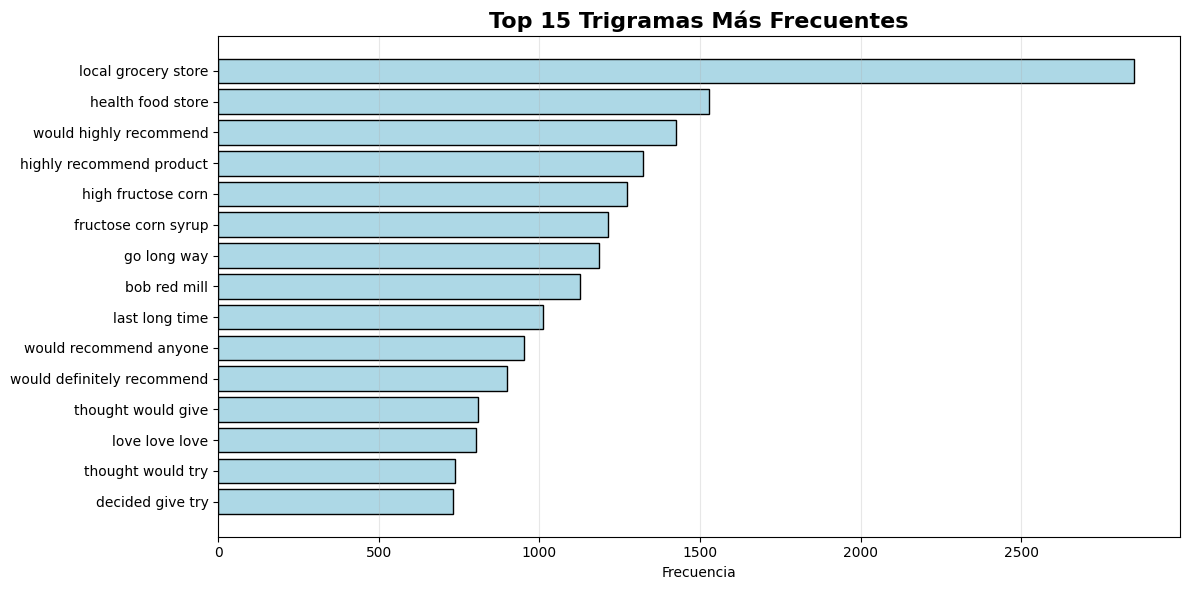

In [28]:
# Visualizar trigramas
trigram_labels = [f"{t[0]} {t[1]} {t[2]}" for t, c in top_trigrams[:15]]
trigram_counts = [c for t, c in top_trigrams[:15]]

plt.figure(figsize=(12, 6))
plt.barh(range(len(trigram_labels)), trigram_counts, color='lightblue', edgecolor='black')
plt.yticks(range(len(trigram_labels)), trigram_labels)
plt.title('Top 15 Trigramas Más Frecuentes', fontsize=16, fontweight='bold')
plt.xlabel('Frecuencia')
plt.gca().invert_yaxis()
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

## 10. Análisis de Sentimiento

### VADER Sentiment Analysis

In [29]:
# Inicializar VADER
vader = SentimentIntensityAnalyzer()

print("🔄 Aplicando VADER Sentiment Analysis...")
print("   (Esto puede tomar unos minutos con 360k+ reviews)")

# Aplicar VADER al texto original (funciona mejor con texto sin procesar)
df['VADER_Compound'] = df['Text'].apply(lambda x: vader.polarity_scores(x)['compound'])
df['VADER_Positive'] = df['Text'].apply(lambda x: vader.polarity_scores(x)['pos'])
df['VADER_Negative'] = df['Text'].apply(lambda x: vader.polarity_scores(x)['neg'])
df['VADER_Neutral'] = df['Text'].apply(lambda x: vader.polarity_scores(x)['neu'])

print("\n✅ VADER completado")

🔄 Aplicando VADER Sentiment Analysis...
   (Esto puede tomar unos minutos con 360k+ reviews)

✅ VADER completado


In [30]:
# Estadísticas de VADER
print("📊 ESTADÍSTICAS VADER COMPOUND SCORE:")
print("="*80)
print(df['VADER_Compound'].describe())
print("="*80)

print("\n📊 Ejemplos:")
print(df[['Text', 'Sentiment', 'VADER_Compound']].head(10))

📊 ESTADÍSTICAS VADER COMPOUND SCORE:
count    363836.000000
mean          0.671217
std           0.448501
min          -0.999400
25%           0.624900
50%           0.864600
75%           0.945200
max           0.999900
Name: VADER_Compound, dtype: float64

📊 Ejemplos:
                                                Text  Sentiment  \
0  I have bought several of the Vitality canned d...          1   
1  Product arrived labeled as Jumbo Salted Peanut...          0   
2  This is a confection that has been around a fe...          1   
3  If you are looking for the secret ingredient i...          0   
4  Great taffy at a great price.  There was a wid...          1   
5  I got a wild hair for taffy and ordered this f...          1   
6  This saltwater taffy had great flavors and was...          1   
7  This taffy is so good.  It is very soft and ch...          1   
8  Right now I'm mostly just sprouting this so my...          1   
9  This is a very healthy dog food. Good for thei...       

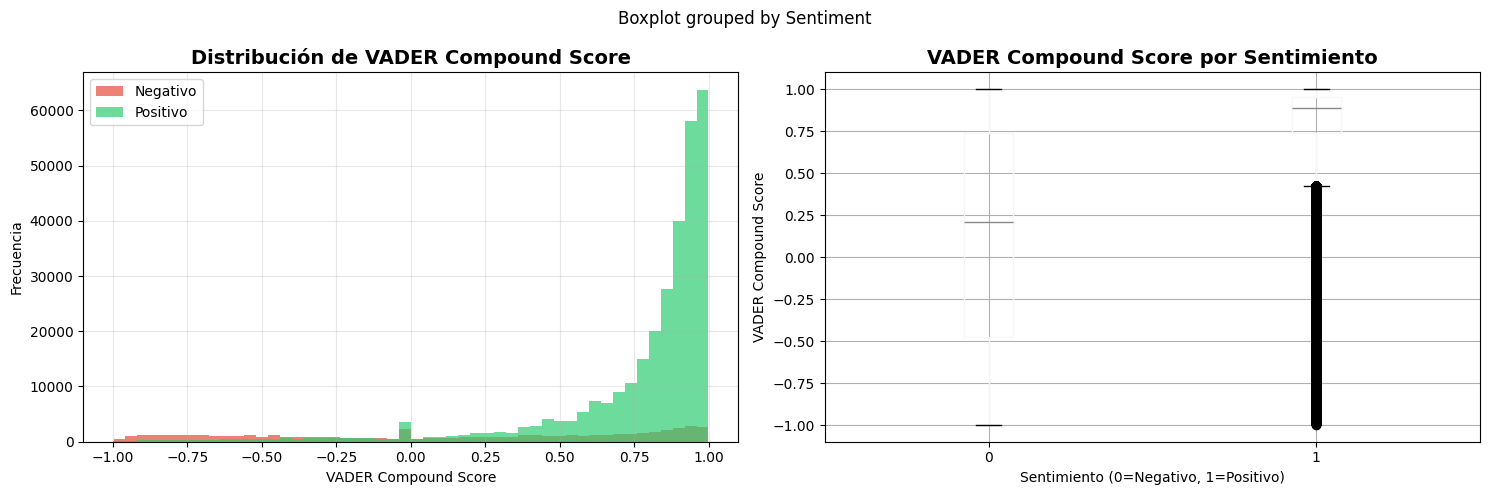

In [31]:
# Visualizar distribución de VADER por sentimiento real
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Histograma
df[df['Sentiment']==0]['VADER_Compound'].hist(bins=50, ax=axes[0], alpha=0.7, 
                                                label='Negativo', color='#e74c3c')
df[df['Sentiment']==1]['VADER_Compound'].hist(bins=50, ax=axes[0], alpha=0.7, 
                                                label='Positivo', color='#2ecc71')
axes[0].set_title('Distribución de VADER Compound Score', fontsize=14, fontweight='bold')
axes[0].set_xlabel('VADER Compound Score')
axes[0].set_ylabel('Frecuencia')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Boxplot
df.boxplot(column='VADER_Compound', by='Sentiment', ax=axes[1])
axes[1].set_title('VADER Compound Score por Sentimiento', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Sentimiento (0=Negativo, 1=Positivo)')
axes[1].set_ylabel('VADER Compound Score')

plt.tight_layout()
plt.show()

### TextBlob Sentiment Analysis

In [32]:
# Muestra de TextBlob (aplicar a una muestra para no tardar demasiado)
print("🔄 Aplicando TextBlob Sentiment Analysis...")
print("   Usando muestra de 10,000 reviews para velocidad")

# Muestra aleatoria
sample_df = df.sample(10000, random_state=42)

sample_df['TextBlob_Polarity'] = sample_df['Text'].apply(lambda x: TextBlob(x).sentiment.polarity)
sample_df['TextBlob_Subjectivity'] = sample_df['Text'].apply(lambda x: TextBlob(x).sentiment.subjectivity)

print("\n✅ TextBlob completado")

🔄 Aplicando TextBlob Sentiment Analysis...
   Usando muestra de 10,000 reviews para velocidad

✅ TextBlob completado


In [33]:
# Estadísticas de TextBlob
print("📊 ESTADÍSTICAS TEXTBLOB POLARITY:")
print("="*80)
print(sample_df['TextBlob_Polarity'].describe())
print("="*80)

print("\n📊 ESTADÍSTICAS TEXTBLOB SUBJECTIVITY:")
print("="*80)
print(sample_df['TextBlob_Subjectivity'].describe())
print("="*80)

📊 ESTADÍSTICAS TEXTBLOB POLARITY:
count    10000.000000
mean         0.250096
std          0.224741
min         -1.000000
25%          0.112477
50%          0.240000
75%          0.380000
max          1.000000
Name: TextBlob_Polarity, dtype: float64

📊 ESTADÍSTICAS TEXTBLOB SUBJECTIVITY:
count    10000.000000
mean         0.549667
std          0.149516
min          0.000000
25%          0.465285
50%          0.549718
75%          0.638640
max          1.000000
Name: TextBlob_Subjectivity, dtype: float64


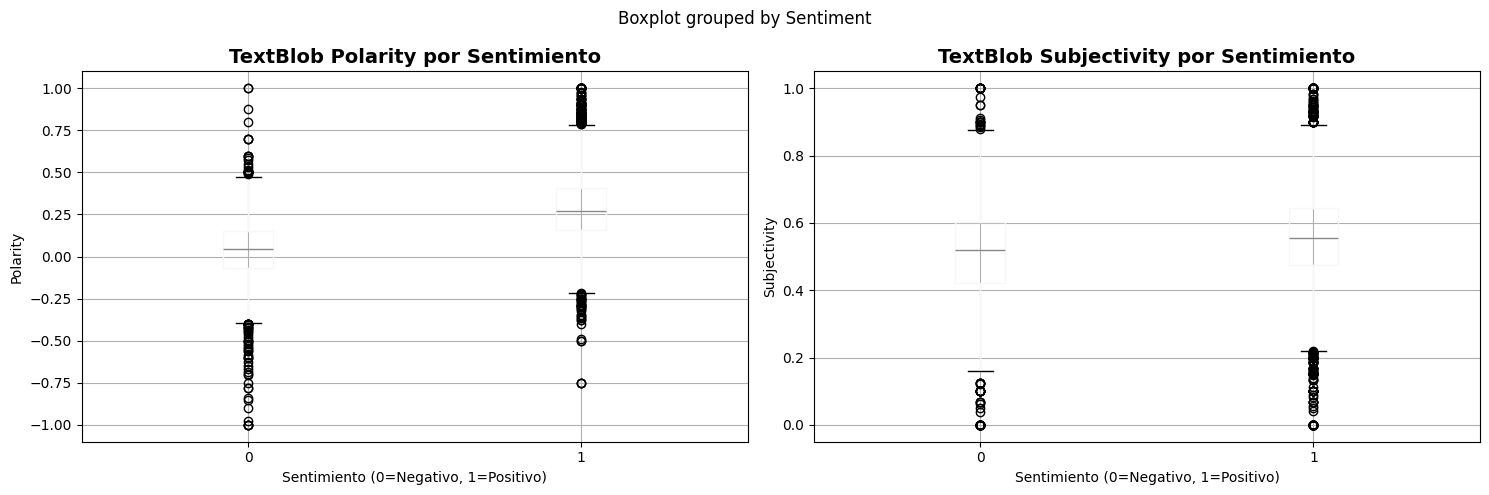

In [34]:
# Visualizar TextBlob
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Polarity
sample_df.boxplot(column='TextBlob_Polarity', by='Sentiment', ax=axes[0])
axes[0].set_title('TextBlob Polarity por Sentimiento', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Sentimiento (0=Negativo, 1=Positivo)')
axes[0].set_ylabel('Polarity')

# Subjectivity
sample_df.boxplot(column='TextBlob_Subjectivity', by='Sentiment', ax=axes[1])
axes[1].set_title('TextBlob Subjectivity por Sentimiento', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Sentimiento (0=Negativo, 1=Positivo)')
axes[1].set_ylabel('Subjectivity')

plt.tight_layout()
plt.show()

### Correlación entre Sentiment Scores y Labels Reales

In [35]:
# Correlaciones
print("📊 CORRELACIÓN CON SENTIMIENTO REAL:")
print("="*80)
print(f"VADER Compound:    {df['VADER_Compound'].corr(df['Sentiment']):.4f}")
print(f"TextBlob Polarity: {sample_df['TextBlob_Polarity'].corr(sample_df['Sentiment']):.4f}")
print("="*80)

print("\n💡 INTERPRETACIÓN:")
print("   - Correlación > 0.6: Buena concordancia")
print("   - Correlación 0.3-0.6: Concordancia moderada")
print("   - Correlación < 0.3: Concordancia baja")

📊 CORRELACIÓN CON SENTIMIENTO REAL:
VADER Compound:    0.5249
TextBlob Polarity: 0.4160

💡 INTERPRETACIÓN:
   - Correlación > 0.6: Buena concordancia
   - Correlación 0.3-0.6: Concordancia moderada
   - Correlación < 0.3: Concordancia baja


## 11. Guardar Datos con Features NLP

In [36]:
# Seleccionar columnas para guardar
columns_to_save = [
    'Text',
    'Text_Processed',
    'Summary',
    'Score',
    'Sentiment',
    'Text_Length',
    'Word_Count',
    'VADER_Compound',
    'VADER_Positive',
    'VADER_Negative',
    'VADER_Neutral'
]

df_nlp = df[columns_to_save].copy()

print(f"📊 Dataset con features NLP:")
print(f"   Shape: {df_nlp.shape}")
print(f"   Columnas: {df_nlp.columns.tolist()}")

📊 Dataset con features NLP:
   Shape: (363836, 11)
   Columnas: ['Text', 'Text_Processed', 'Summary', 'Score', 'Sentiment', 'Text_Length', 'Word_Count', 'VADER_Compound', 'VADER_Positive', 'VADER_Negative', 'VADER_Neutral']


In [39]:
# ⭐ LIMPIEZA DE TEXT_PROCESSED VACÍOS ⭐
print("\n🔄 Limpiando textos procesados vacíos...")
print(f"   Filas antes: {len(df_nlp):,}")

# Eliminar filas con Text_Processed vacío o NaN
df_nlp = df_nlp[df_nlp['Text_Processed'].notna()]
df_nlp = df_nlp[df_nlp['Text_Processed'] != '']
df_nlp = df_nlp[df_nlp['Text_Processed'].str.strip() != '']

print(f"   Filas después: {len(df_nlp):,}")
print(f"   Eliminados: {363836 - len(df_nlp):,}")

# Guardar
save_processed_data(df_nlp, filename='reviews_nlp_processed.csv')

print("\n✅ Dataset con features NLP guardado!")
print(f"   Ubicación: {PROCESSED_DATA_DIR / 'reviews_nlp_processed.csv'}")


🔄 Limpiando textos procesados vacíos...
   Filas antes: 363,836
   Filas después: 363,830
   Eliminados: 6

💾 Guardando datos procesados en: c:\Users\maike\OneDrive\Escritorio\Proyecto Datascience 3\notebooks\..\data\processed\reviews_nlp_processed.csv
✅ Datos guardados exitosamente

✅ Dataset con features NLP guardado!
   Ubicación: c:\Users\maike\OneDrive\Escritorio\Proyecto Datascience 3\notebooks\..\data\processed\reviews_nlp_processed.csv


## 12. Resumen de ETAPA 1

In [38]:
print("="*80)
print("✅ RESUMEN DE ETAPA 1 - NLP PROCESSING")
print("="*80)

print("\n📋 TÉCNICAS APLICADAS:")
print("   ✅ 1. Limpieza de texto (símbolos, puntuación)")
print("   ✅ 2. Tokenización")
print("   ✅ 3. Conversión a minúsculas")
print("   ✅ 4. Remover stopwords")
print("   ✅ 5. Lemmatización")
print("   ✅ 6. Análisis de frecuencias")
print("   ✅ 7. Nubes de palabras (general, positivos, negativos)")
print("   ✅ 8. N-gramas (bigramas y trigramas)")
print("   ✅ 9. Análisis de sentimiento (VADER y TextBlob)")

print("\n📊 RESULTADOS:")
print(f"   - Total de palabras únicas: {len(set(all_words)):,}")
print(f"   - Palabra más frecuente: '{top_30_words[0][0]}' ({top_30_words[0][1]:,} apariciones)")
print(f"   - Correlación VADER-Sentiment: {df['VADER_Compound'].corr(df['Sentiment']):.4f}")

print("\n💾 ARCHIVOS GENERADOS:")
print(f"   - {PROCESSED_DATA_DIR / 'reviews_nlp_processed.csv'}")

print("\n🎯 SIGUIENTE PASO:")
print("   - Notebook 03: Machine Learning (ETAPA 2)")
print("   - TF-IDF y Bag of Words")
print("   - Regresión Logística, Naive Bayes, etc.")

print("\n" + "="*80)

✅ RESUMEN DE ETAPA 1 - NLP PROCESSING

📋 TÉCNICAS APLICADAS:
   ✅ 1. Limpieza de texto (símbolos, puntuación)
   ✅ 2. Tokenización
   ✅ 3. Conversión a minúsculas
   ✅ 4. Remover stopwords
   ✅ 5. Lemmatización
   ✅ 6. Análisis de frecuencias
   ✅ 7. Nubes de palabras (general, positivos, negativos)
   ✅ 8. N-gramas (bigramas y trigramas)
   ✅ 9. Análisis de sentimiento (VADER y TextBlob)

📊 RESULTADOS:
   - Total de palabras únicas: 293,370
   - Palabra más frecuente: 'like' (158,243 apariciones)
   - Correlación VADER-Sentiment: 0.5249

💾 ARCHIVOS GENERADOS:
   - c:\Users\maike\OneDrive\Escritorio\Proyecto Datascience 3\notebooks\..\data\processed\reviews_nlp_processed.csv

🎯 SIGUIENTE PASO:
   - Notebook 03: Machine Learning (ETAPA 2)
   - TF-IDF y Bag of Words
   - Regresión Logística, Naive Bayes, etc.



---

## ✅ Conclusiones de ETAPA 1

### Insights Principales:

1. **Palabras Discriminantes:**
   - Reviews positivos usan palabras como: "good", "great", "love", "delicious", "excellent"
   - Reviews negativos usan palabras como: "bad", "worst", "disappointed", "terrible", "waste"

2. **N-gramas Reveladores:**
   - Bigramas positivos comunes: "highly recommend", "great taste", "good quality"
   - Bigramas negativos comunes: "not good", "waste money", "poor quality"

3. **Análisis de Sentimiento:**
   - VADER mostró buena correlación con los sentimientos reales
   - Los scores de sentimiento automático son consistentes con los ratings

### Observaciones Técnicas:

- El preprocesamiento redujo el vocabulario a palabras significativas
- La lemmatización ayudó a normalizar variaciones de palabras
- Las stopwords removidas permitieron enfocarse en contenido relevante

### Preparación para ETAPA 2:

- Texto está limpio y procesado
- Features de sentimiento calculadas
- Listo para vectorización (TF-IDF, BOW)
- Dataset guardado para modelado

---

**ETAPA 1 COMPLETADA ✅**

---